<a href="https://colab.research.google.com/github/mwahajkhan/Supervised-ML-Regression-/blob/main/Regression_Transformation_Boston_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Regression: Transforming Target**

* Data: Boston Housing Data
* Applying transformations to make target variable more normally distributed for Regression
* Applying inverse transformations to be able to use these in a Regression context

In [7]:
#import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* **Defining some important plotting functions:**



In [8]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)

def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

* **Fetching data:**

In [9]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

--2024-05-29 18:31:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60056 (59K) [binary/octet-stream]
Saving to: ‘boston_housing_clean.pickle’

boston_housing_clea 100%[===================>]  58.65K  --.-KB/s    in 0.06s   

2024-05-29 18:31:08 (1001 KB/s) - ‘boston_housing_clean.pickle’ saved [60056/60056]



* **Loading Data:**

In [10]:
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']


In [11]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Determining  Normality

> Determine if data is normally distributed visually and through statistical test

> If data is normally distributed we can apply transformations to make it normally distributed

#### Using a Visual approach


#### Plotting a histogram:

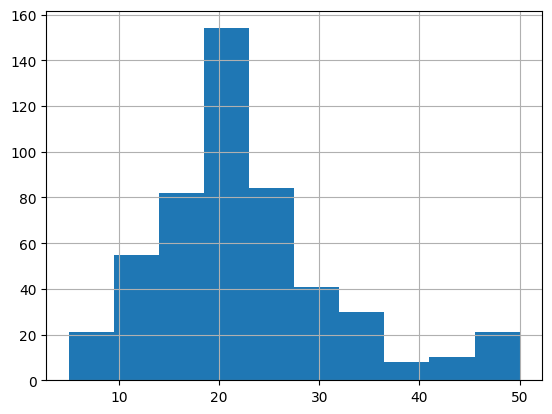

In [9]:
boston_data.MEDV.hist();

The histogram does not look normal due to its right tail.


#### Using a Statistical Test

* This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist approach accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [13]:
from scipy.stats.mstats import normaltest

In [14]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

> P value is really small and far from a normal distribution

> Therefore reject null hypothesis i.e. it is a normal distribution

### Applying transformations to make target variable more normally distributed for Regression

> Log : The log transformation can transform data that is significantly skewed right to be more normally distributed:

> Square Root: The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

> Box Cox: The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

> It is defined as:

**$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$**

> This is like a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


### Log Transformation


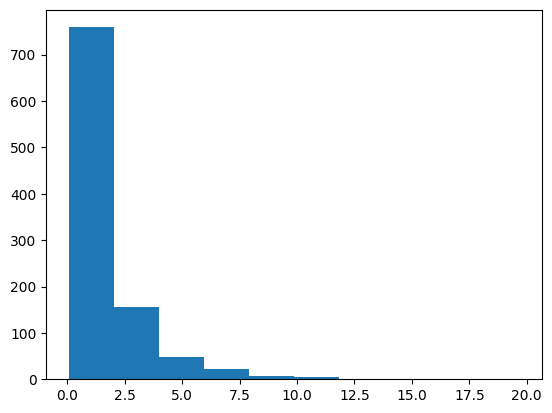

In [15]:
data = plot_exponential_data()

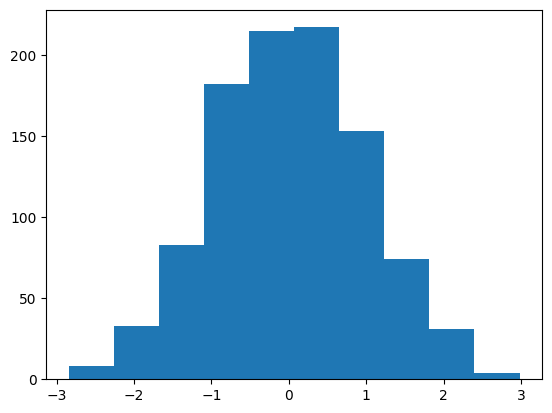

In [24]:
plt.hist(np.log(data));

**Apply transformation to Boston Housing data:**


In [16]:
log_medv = np.log(boston_data.MEDV)

<Axes: >

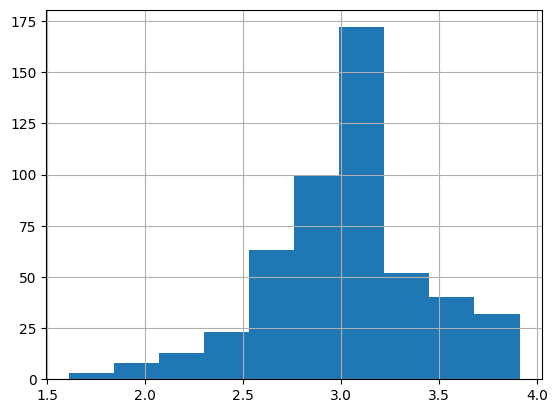

In [17]:
log_medv.hist()

In [27]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

> Conclusion: The output is closer to normal distribution, but still not completely normal.

> Still low p value so reject the null

### Square root Transformation


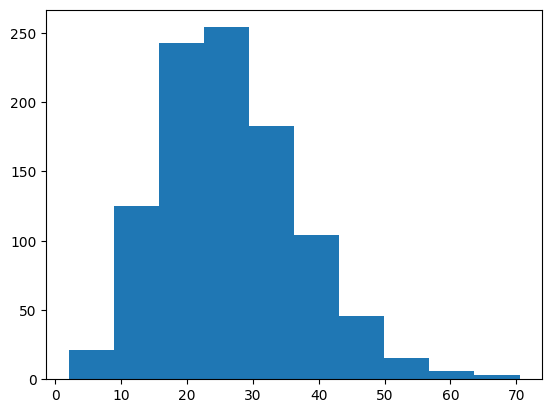

In [18]:
data = plot_square_normal_data()

slightly right skewed

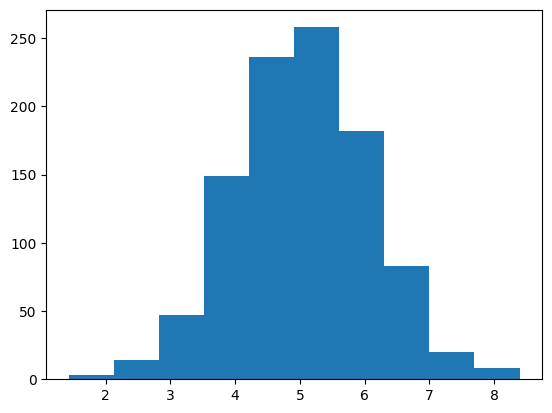

In [19]:
plt.hist(np.sqrt(data));

* applying sqrt to our normal function

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

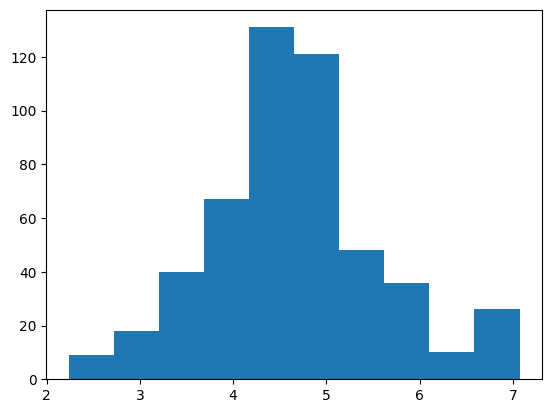

In [20]:
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

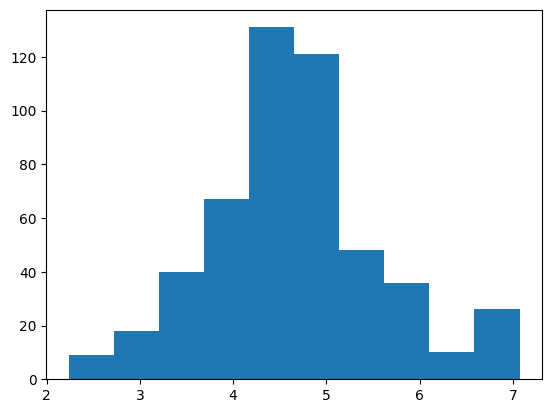

In [21]:
#shortcut to sqrt boston data
plt.hist(np.sqrt(boston_data.MEDV));

In [22]:
#doing normal test
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

> Still low p value, so we reject the null

### Box cox Transformation


In [23]:
from scipy.stats import boxcox

In [24]:
#Gives two outputs [0] actual transformed arrar
#[1] lambda parameter determines nature of transformation
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [25]:
#actual transformed array
bc_result

(array([4.57293637, 4.36558166, 5.33694273, 5.25495447, 5.42860689,
        4.93592663, 4.48001683, 4.81796329, 3.85654088, 4.10949441,
        3.68340136, 4.10949441, 4.37457314, 4.25505556, 4.03844836,
        4.20749535, 4.49716757, 3.96522837, 4.23614226, 4.03844836,
        3.50909851, 4.17850811, 3.70724917, 3.62267296, 3.75421675,
        3.54759408, 3.86763825, 3.65930314, 4.05896259, 4.31093716,
        3.38947462, 3.62267296, 3.45672253, 3.44343457, 3.49611884,
        4.10949441, 4.21708168, 4.31093716, 4.63034334, 5.08317362,
        5.34934183, 4.77998166, 4.67854354, 4.63034334, 4.32928636,
        4.14917118, 4.21708168, 3.86763825, 3.61033098, 4.15898961,
        4.18820891, 4.26445779, 4.65455672, 4.52267685, 4.10949441,
        5.3800978 , 4.63034334, 5.1372014 , 4.51420237, 4.17850811,
        4.08940884, 3.80025017, 4.41904971, 4.65455672, 5.2292247 ,
        4.53112301, 4.15898961, 4.40135419, 3.95458193, 4.30171118,
        4.58947077, 4.37457314, 4.47139742, 4.52

In [27]:
len(bc_result)

2

In [29]:
#[1] lambda parameter determines nature of transformation
lam

0.2166209012915364

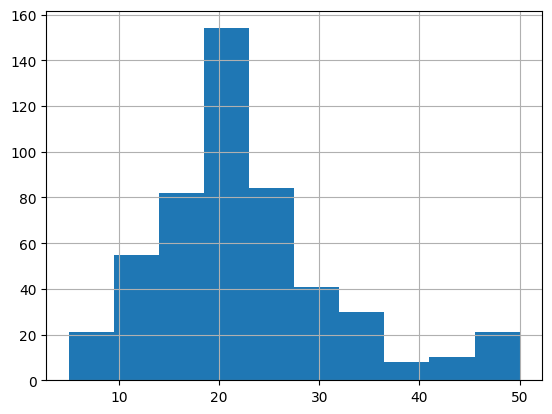

In [30]:
boston_data['MEDV'].hist();

In [31]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Conclusion: The output is closer to normal distribution, but still not completely normal.

* significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

* **We do not reject the null**

* **We assume, we have something closer to normal**

### Testing regression:


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)


In [33]:
#instanciate to use later
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [35]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [36]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**Create Polynomial Features**


In [37]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [38]:
X_pf

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [39]:
X.shape

(506, 13)

In [40]:
X_pf.shape

(506, 104)

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, Y, test_size=0.3,
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [42]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

* After StandardScaler, apply boxcox transformation

> **Only learning from training data, x_train, y_train which we split, so making transformations to make sure are uniform distributions**

In [44]:
#boxcox transformation gives two outputs

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0] #Actual values Transformed values index 0 of output
lam2 = bc_result2[1]       #Lamda value, parameter we learned from data to comeup with normal distribution

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [45]:
lam2

0.2751714409758365

In [53]:
#Actual predictions
y_train_bc

array([4.8625686 , 6.0629177 , 4.51310411, 4.81957899, 4.95725428,
       5.77277497, 5.41197088, 5.75640624, 3.72665146, 4.94686892,
       5.75640624, 4.80874112, 3.92225296, 4.58384068, 4.78695477,
       6.64804017, 3.77300722, 2.91446761, 3.99405229, 5.37557157,
       2.91446761, 5.14858214, 3.37830364, 5.61413692, 4.46503222,
       6.62861276, 3.53307611, 3.78829063, 4.6643901 , 4.74293114,
       4.76501893, 4.58384068, 6.66093826, 4.90499278, 4.72068886,
       5.1583522 , 3.30653002, 3.15681299, 4.6070669 , 6.0021158 ,
       7.02952208, 4.6870301 , 3.78829063, 5.05933485, 4.19940562,
       4.93645035, 6.30368143, 7.02952208, 5.65657858, 4.54867373,
       4.59547537, 4.6070669 , 4.8411456 , 5.37557157, 3.93675676,
       4.22573738, 4.6070669 , 4.47712066, 4.54867373, 5.61413692,
       4.93645035, 2.39638821, 4.88385027, 3.6795137 , 5.08935167,
       4.78695477, 6.22513995, 4.92599831, 6.02503476, 4.10535832,
       4.4284788 , 4.59547537, 5.51012859, 3.51631095, 5.05933

In [55]:
#test values
y_test

502    20.6
127    16.2
390    15.1
303    33.1
277    33.1
       ... 
433    14.3
505    11.9
53     23.4
82     24.8
377    13.3
Name: MEDV, Length: 152, dtype: float64

* Currently difference in scales of
y_train_bc and the y_test

* Inverse transformation on boxcox_medv in order to bring these two varaibles on the same scale.

In [48]:
#Fitting on initially instanciated linear regression model

lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test) #s defined before and fit to x_train
y_pred_bc = lr.predict(X_test_s) #Comes up with actual predictions

#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [49]:
from scipy.special import inv_boxcox

In [57]:
bc_result = boxcox(y_train)
boxcox_medv = bc_result2[0] #Actual values Transformed values index 0 of output
lam = bc_result[1]

In [60]:
boxcox_medv[:10]

array([4.8625686 , 6.0629177 , 4.51310411, 4.81957899, 4.95725428,
       5.77277497, 5.41197088, 5.75640624, 3.72665146, 4.94686892])

In [59]:
#doing inverse of function to get to original form of x
inv_boxcox(boxcox_medv, lam)[:10] #show only 10 first values

array([21.9, 35.4, 18.8, 21.5, 22.8, 31.7, 27.5, 31.5, 13. , 22.7, 31.5,
       21.4, 14.3, 19.4, 21.2, 43.8, 13.3,  8.5, 14.8, 27.1,  8.5, 24.7,
       10.9, 29.8, 18.4, 43.5, 11.8, 13.4, 20.1, 20.8, 21. , 19.4, 44. ,
       22.3, 20.6, 24.8, 10.5,  9.7, 19.6, 34.6, 50. , 20.3, 13.4, 23.8,
       16.3, 22.6, 38.7, 50. , 30.3, 19.1, 19.5, 19.6, 21.7, 27.1, 14.4,
       16.5, 19.6, 18.5, 19.1, 29.8, 22.6,  6.3, 22.1, 12.7, 24.1, 21.2,
       37.6, 22.5, 34.9, 15.6, 18.1, 19.5, 28.6, 11.7, 23.8, 19.1, 33.4,
       19.4, 15.2, 19.4, 50. , 28. , 22. , 18.5, 50. , 20. , 23.4,  9.5,
       50. , 19.3, 23.9, 24.3,  5. , 19.1, 19.8, 21.9,  8.3, 22.9, 20. ,
       23.1, 33.2, 13.4, 20.4, 24.1, 20.3, 25. , 13.4,  8.8, 21.7, 31.6,
       19.4, 20.9, 17.9, 12.8, 24.8, 13.5, 21.1, 34.9, 17.8, 26.5, 29.6,
        8.1, 28.7,  5. , 30.8, 18.5, 18. , 21.9, 25. , 15. , 28.5, 19.3,
       17.2, 10.2, 28.1, 30.1, 29.1, 35.2, 19.7, 21.7, 12.7, 18.2, 19.5,
       15.2, 36.4, 15.2, 33.2, 20.5, 36.2,  7.5, 21

In [51]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### Determine the R^2 of a LinearRegression without the box cox transformation.


1. Applying the inverse transformation to `y_pred_bc`.

2. Calculating the $R^2$ using the result of this inverse transformation and `y_test`.  


In [61]:
#lam2 second output from boxcox
y_pred_train = inv_boxcox(y_pred_bc, lam2)

#find r2 score between predicted and test values
r2_score(y_pred_train, y_test)

0.8798635748248219

* R2 score is from the y_pred_train, which is our new variable with the inverse of the boxcox compared to the original y_test.

* high r2 score, indicating strong predictions



### Determining the R^2 of a LinearRegression without the box cox transformation.


In [63]:
lr = LinearRegression()
lr.fit(X_train_s, y_train) #y_train without bx transformation
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred, y_test)

0.8558518908813469

Hence, the boxcox transformation of coming up with more normal distribution for our outcome variable did improve the score